# 神经网络
神经网络的一个重要性质是它可以自动地从数据中学习到合适的权重参数。

## 示例
用图来表示神经网络的话，如图3-1所示。我们把最左边的一列称为输入层，最右边的一列称为输出层，中间的一列称为中间层。中间层有时也称为隐藏层。“隐藏”一词的意思是，隐藏层的神经元（和输入层、输出层不同）肉眼看不见。

![图3-1](./picture/3_1.jpg)
> 图 3-1中的网络一共由 3层神经元构成，但实质上只有 2层神经元有权重，因此将其称为“2层网络”。

## 激活函数
激活函数$h()$的作用在于决定如何来激活输入信号的总和。激活函数是连接感知机和神经网络的桥梁。

![图3-4](./picture/3_4.jpg)
### 阶跃函数

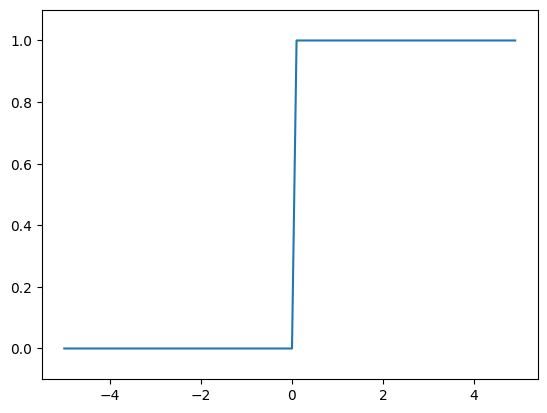

In [64]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):                       # 实现阶跃函数，接受一个实数或实数数组 x 作为输入，返回一个由 0 和 1 组成的整数数组，表示 x 中每个元素是否大于 0
    return np.array(x > 0, dtype=np.int_)   # x > 0 生成一个布尔型数组，表示 x 中每个元素是否大于 0
                                            # np.array(..., dtype=np.int_) 将布尔型数组转换为整数型数组，其中 dtype=np.int_ 表示使用 64 位整数类型


x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### Sigmoid 函数

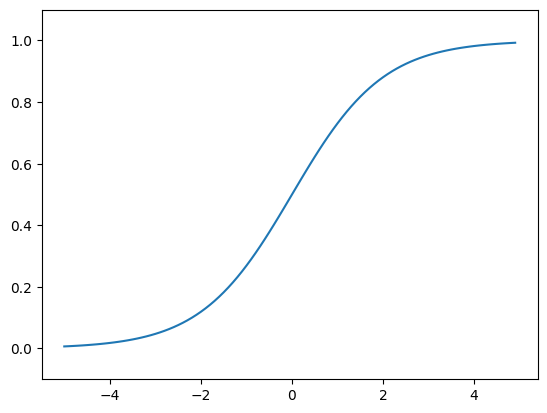

In [65]:
def sigmoid(x):                     # 实现 Sigmoid 函数
    return 1 / (1 + np.exp(-x))


x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

**阶跃函数和sigmoid函数的差异:**
- sigmoid函数是一条平滑的曲线，输出随着输入发生连续性的变化。而阶跃函数以0为界，输出发生急剧性的变化。sigmoid函数的平滑性对神经网络的学习具有重要意义。
- 相对于阶跃函数只能返回0或1，sigmoid函数可以返回0.731 ...、0.880 ...等实数（这一点和刚才的平滑性有关）。也就是说，感知机中神经元之间流动的是0或1的二元信号，而神经网络中流动的是连续的实数值信号。

**阶跃函数和sigmoid函数的共同性质:**
- 阶跃函数和sigmoid函数虽然在平滑性上有差异，但是如果从宏观视角可以发现它们具有相似的形状。实际上，两者的结构均是“输入小时，输出接近0（为0）；随着输入增大，输出向1靠近（变成1）”。也就是说，当输入信号为重要信息时，阶跃函数和sigmoid函数都会输出较大的值；当输入信号为不重要的信息时，两者都输出较小的值。还有一个共同点是，不管输入信号有多小，或者有多大，输出信号的值都在0到1之间。
- 两者均为非线性函数

**神经网络必须使用非线性函数:**
- 线性函数的问题在于，不管如何加深层数，总是存在与之等效的“无隐藏层的神经网络”。因此，为了发挥叠加层所带来的优势，激活函数必须使用非线性函数

### ReLU 函数

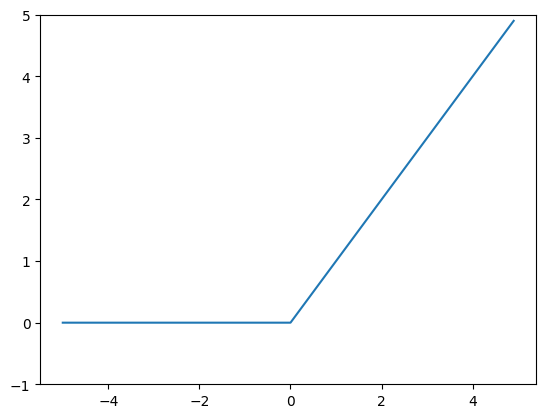

In [66]:
def relu(x):
    return np.maximum(0, x)


x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1, 5)
plt.show()

## 3层神经网络的实现

### 神经网络的内积

![图3-14](./picture/3_14.jpg)

### 符号确认

![图3-16](./picture/3_16.jpg)

### 各层间信号传递的实现
![图3-17](./picture/3_17.jpg)
图 3-17中增加了表示偏置的神经元 “1”。请注意, 偏置的右下角的索引 号只有一个。这是因为前一层的偏置神经元 (神经元 “1”) 只有一个 ${ }^{11}$ 。
为了确认前面的内容, 现在用数学式表示 $a_1^{(1)} 。 a_1^{(1)}$ 通过加权信号和偏 置的和按如下方式进行计算。
$$
a_1^{(1)}=w_{11}^{(1)} x_1+w_{12}^{(1)} x_2+b_1^{(1)}
$$
此外, 如果使用矩阵的乘法运算, 则可以将第 1 层的加权和表示成下面 的式 (3.9)。
$$
\boldsymbol{A}^{(1)}=\boldsymbol{X} \boldsymbol{W}^{(1)}+\boldsymbol{B}^{(1)}
$$
其中, $\boldsymbol{A}^{(1)} 、 \boldsymbol{X} 、 \boldsymbol{B}^{(1)} 、 \boldsymbol{W}^{(1)}$ 如下所示。
$$
\begin{aligned}
\boldsymbol{A}^{(1)} & =\left(\begin{array}{lll}
a_1^{(1)} & a_2^{(1)} & a_3^{(1)}
\end{array}\right), \boldsymbol{X}=\left(\begin{array}{ll}
x_1 & x_2
\end{array}\right), \boldsymbol{B}^{(1)}=\left(\begin{array}{lll}
b_1^{(1)} & b_2^{(1)} & b_3^{(1)}
\end{array}\right) \\
\boldsymbol{W}^{(1)} & =\left(\begin{array}{lll}
w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
\end{array}\right)
\end{aligned}
$$

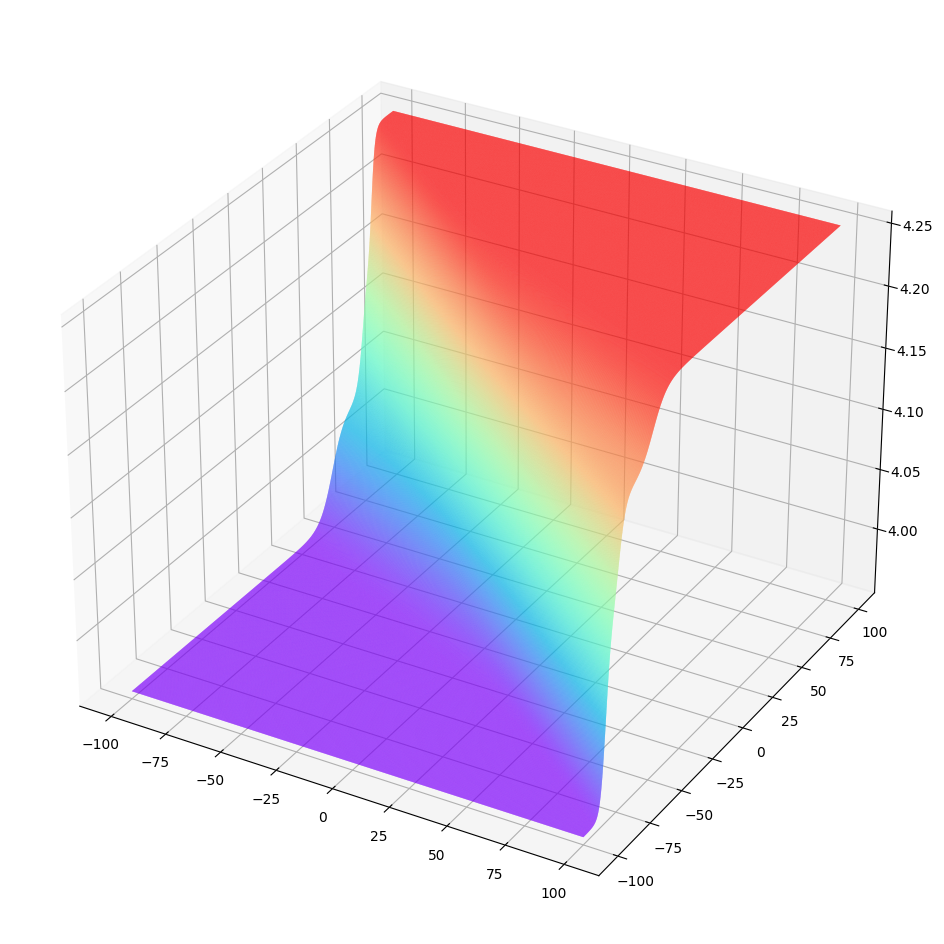

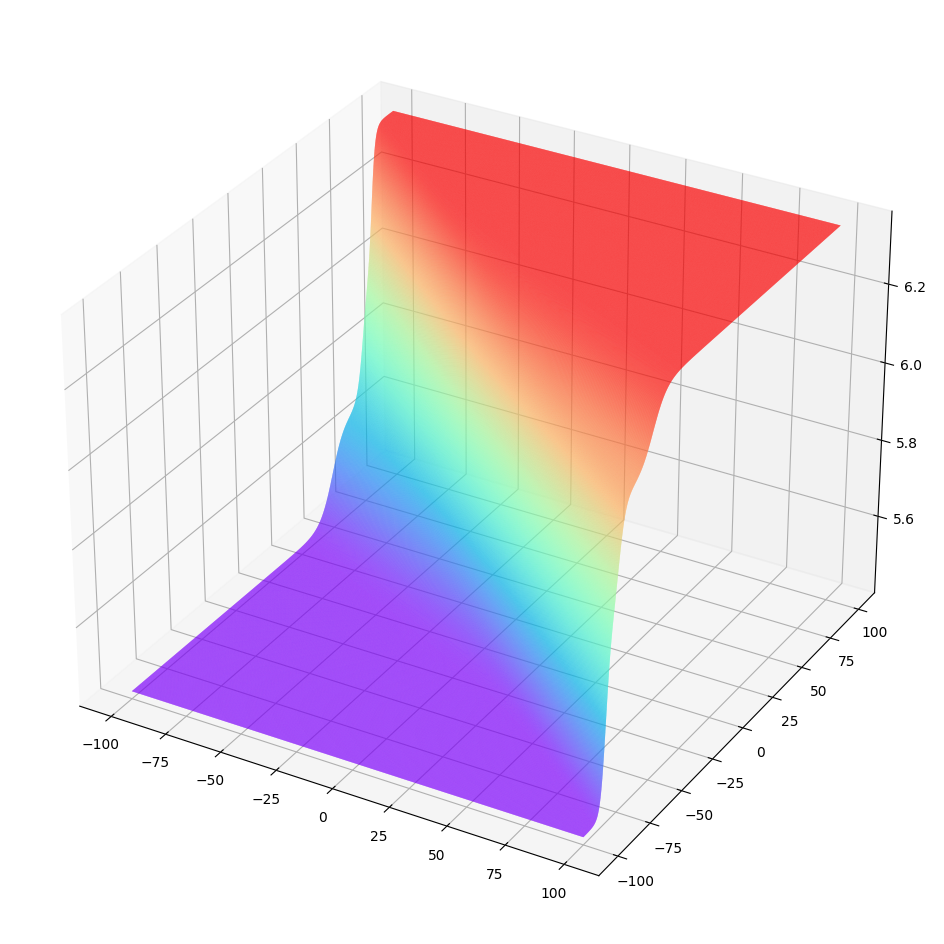

In [67]:
import matplotlib.pyplot as plt


def identity_function(x):
    return x


def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y


network = init_network()

x, y = np.mgrid[-100:100:1000j, -100:100:1000j]
input_data = np.stack([x.ravel(), y.ravel()], axis=1)

output = forward(network, input_data)
output_first_column = output[:, 0].reshape((1000, 1000))
output_second_column = output[:, 1].reshape((1000, 1000))

figure = plt.figure(figsize=(12, 12))
axes = plt.axes(projection="3d")
surface_first_column = axes.plot_surface(x, y, output_first_column,
                                         rstride=1,
                                         cstride=1,
                                         cmap=plt.get_cmap('rainbow'))
plt.show()

figure = plt.figure(figsize=(12, 12))
axes = plt.axes(projection="3d")
surface_second_column = axes.plot_surface(x, y, output_second_column,
                                          rstride=1,
                                          cstride=1,
                                          cmap=plt.get_cmap('rainbow'))
plt.show()

## 输出层设计
神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出层的激活函数。一般而言，回归问题用恒等函数，分类问题用softmax函数。
- 分类问题是数据属于哪一个类别的问题。
- 回归问题是根据某个输入预测一个（连续的）数值的问题。

### 恒等函数
恒等函数会将输入按原样输出，对于输入的信息，不加以任何改动地直接输出。

![图3-21](./picture/3_21.jpg)

### softmax函数
分类问题中使用的softmax函数可以用下面的式（3.10）表示。
$$
y_k=\frac{\exp \left(a_k\right)}{\sum_{i=1}^n \exp \left(a_i\right)}
$$
$\exp (x)$ 是表示 $\mathrm{e}^x$ 的指数函数 ( $\mathrm{e}$ 是纳皮尔常数 $\left.2.7182 \cdots\right)$ 。式 (3.10) 表示 假设输出层共有 $n$ 个神经元, 计算第 $k$ 个神经元的输出 $y_k$ 。如式 (3.10) 所示, softmax 函数的分子是输人信号 $a_k$ 的指数函数, 分母是所有输人信号的指数函数的和。

![图3-22](./picture/3_22.jpg)

In [68]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 输出层的神经元数量
- 对于分类问题，输出层的神经元数量一般设定为类别的数量。

## 手写数字识别
和求解机器学习问题的步骤（分成学习和推理两个阶段进行）一样，使用神经网络解决问题时，也需要首先使用训练数据（学习数据）进行权重参数的学习；进行推理时，使用刚才学习到的参数，对输入数据进行分类。

### MNIST数据集
MNIST是机器学习领域最有名的数据集之一，被应用于从简单的实验到发表的论文研究等各种场合。